# Author details and requirements

**Author**: Daniel Hortelano Roig</br>
**Organisation**: University of Oxford, UK</br>
**Contact**: daniel.hortelanoroig@gmail.com</br>
**Date**: December 2024

The [pyLabFEA
](https://github.com/AHartmaier/pyLabFEA) package is required to run this notebook. This notebook is also available on Google Colab via [link](https://colab.research.google.com/drive/1_Zb-W7mjuLjIyOC_xDnqaGa-0zTh-Zff#scrollTo=o4UXsXWGTejT).

# Finite Element Method (FEM)

In this session we will explore the simulation method known as the finite element method (FEM). We will run some simple deformation simulations. The [pyLabFEA
](https://github.com/AHartmaier/pyLabFEA) package is required to run this notebook. This notebook is also available on Google Colab via [link](https://colab.research.google.com/drive/1_Zb-W7mjuLjIyOC_xDnqaGa-0zTh-Zff#scrollTo=o4UXsXWGTejT).

## Importing simulation code

### Libraries

In [ ]:
import pylab as pyl
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pylabfea as fea

## Some notes on elasticity

Recall the relations provided by Hooke's law:
\begin{equation}
\tau = \mu \epsilon
\end{equation}
for shear stresses and strains, and
\begin{equation}
\sigma = E \epsilon
\end{equation}
for normal stresses and strains. In these equations, $\mu$ is the shear modulus and $E$ is the Young's modulus. In general, these two types of deformation can couple and cause effects which are not obvious.

The Poisson's ratio $\nu$ is related to the two other parameters via the expression
\begin{equation}
E = 2\mu(1+\nu)
\end{equation}

## Tensile test of Zirconium metal

In FEM, the following steps are required to simulate some deformation:

1. Define the material and geometric parameters
2. Construct the FEM base class
3. Define the boundary conditions
4. Solve the system of equations

>Note that, in FEM simulations, the units are always as follows:
>* Stress: MPa ($10^6$ Pascals)
>* Length: milimetres ($10^{-3}$ metres)
>* Time: microseconds ($10^{-6}$ seconds)





### Define material and geometrical parameters

In [ ]:
warnings.filterwarnings("ignore")

# Define material parameters

mu = 37.1e3 # Shear modulus
nu = 0.32 # Poisson's ratio
E = 2*mu*(1+nu) # Young's modulus

# Define domain and mesh parameters

LX = LY = 10. # Remember this is now in milimetres!
mx = my = 10
w = LX/mx
h = LY/my

### Construct FEM base

In [ ]:
# FEM construction

fet = fea.Model(dim=2,planestress=True)
fet.geom(sect=1, LX=LX, LY=LY)
mat = fea.Material()              # create element of class Material
mat.elasticity(E=E, nu=nu)  # assign isotropic elastic properties
fet.assign([mat])
fet.mesh(NX=mx,NY=my,SF=1)

### Define boundary conditions

The boundary conditions (BCs) must be defined independently for both the x- and y-directions along the boundary. For each direction on each boundary, you have a choice to specify either a force or a displacement BC.

In [ ]:
# Boundary conditions

# Write the total strain in terms of the length in the x-direction:
etot = 0.5*LX

fet.bcleft(0., 'disp','x')
fet.bcleft(0., 'disp','y')
fet.bcright(etot, 'disp','x')
fet.bcright(0, 'disp','y')
fet.bctop(0, 'force','x')
fet.bctop(0, 'force','y')
fet.bcbot(0., 'force','x')
fet.bcbot(0., 'force','y')

### Solve the system of equations

In [ ]:
# Solve

fet.solve()

### Plotting the deformation

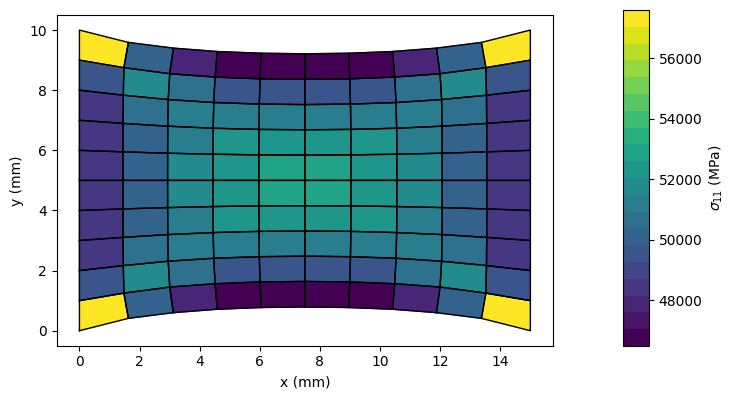

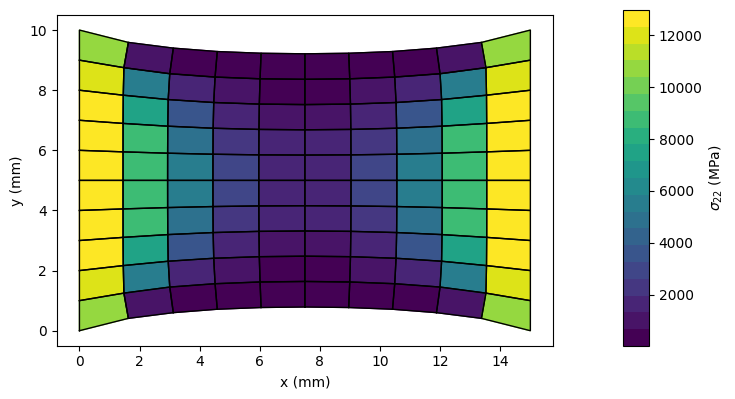

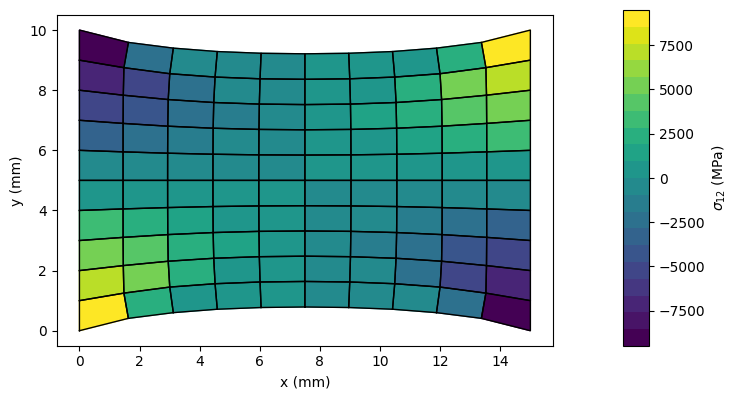

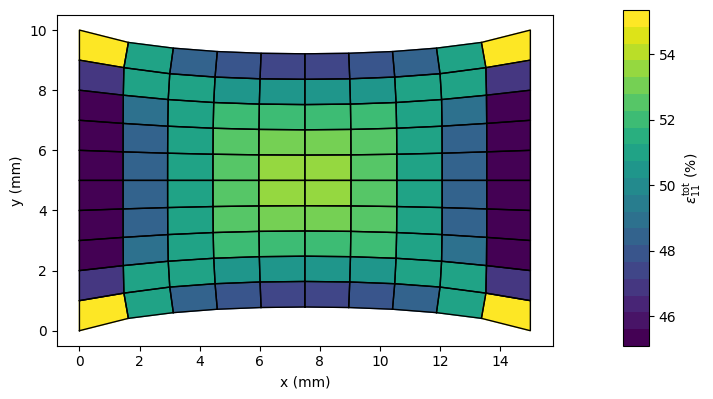

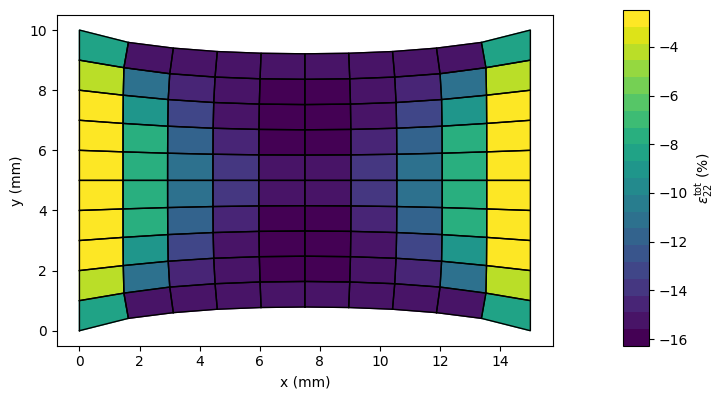

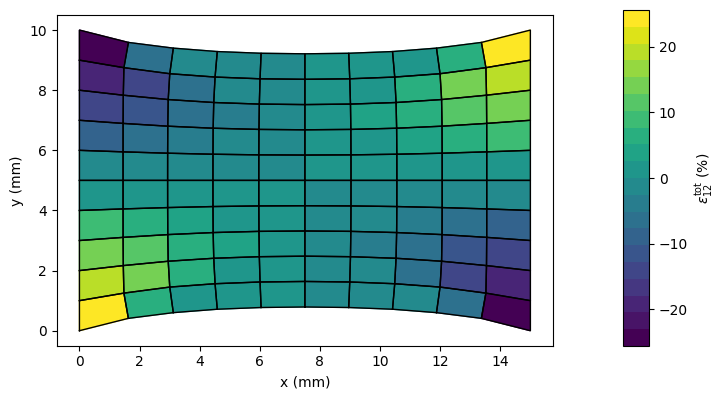

In [ ]:
fet.plot('stress1', mag=1, shownodes=False)
fet.plot('stress2', mag=1, shownodes=False)
fet.plot('stress12', mag=1, shownodes=False)
fet.plot('strain1', mag=1, shownodes=False)
fet.plot('strain2', mag=1, shownodes=False)
fet.plot('strain12', mag=1, shownodes=False)

## Cantilever bending test of Zirconium metal

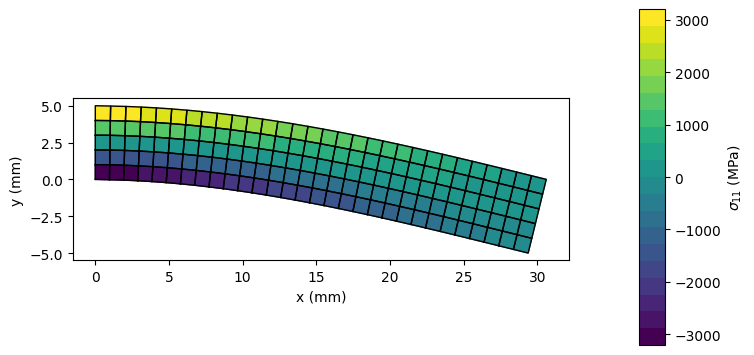

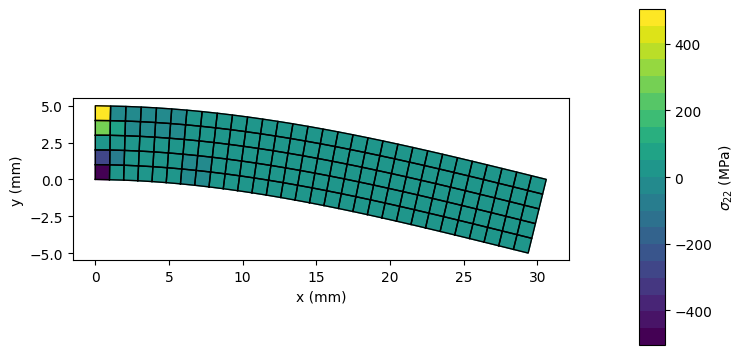

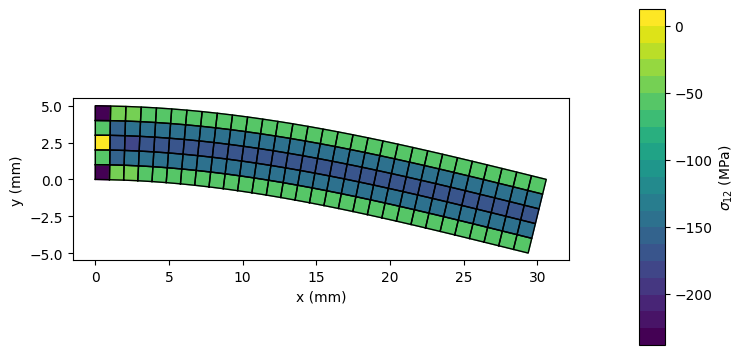

In [ ]:
# Define material parameters

mu = 37.1e3 # Shear modulus
nu = 0.32 # Poisson's ratio
E = 2*mu*(1+nu) # Young's modulus

# Define domain and mesh parameters

LX = 30.
LY = 5.
mx = 30
my = 5
w = LX/mx
h = LY/my

# FEM construction

feb = fea.Model(dim=2,planestress=True)
feb.geom(sect=1, LX=LX, LY=LY)
mat = fea.Material()              # create element of class Material
mat.elasticity(E=E, nu=nu)  # assign isotropic elastic properties
feb.assign([mat])
feb.mesh(NX=mx,NY=my,SF=1)

# Boundary conditions

etot = -1*LY

feb.bcleft(0., 'disp','x')
feb.bcleft(0., 'disp','y')
feb.bcright(0, 'force','x')
feb.bcright(etot, 'disp','y')
feb.bctop(0, 'force','x')
feb.bctop(0, 'force','y')
feb.bcbot(0., 'force','x')
feb.bcbot(0., 'force','y')

# Solve

feb.solve()

# Plot

feb.plot('stress1', mag=1, shownodes=False)
feb.plot('stress2', mag=1, shownodes=False)
feb.plot('stress12', mag=1, shownodes=False)

## Deformation of a composite material

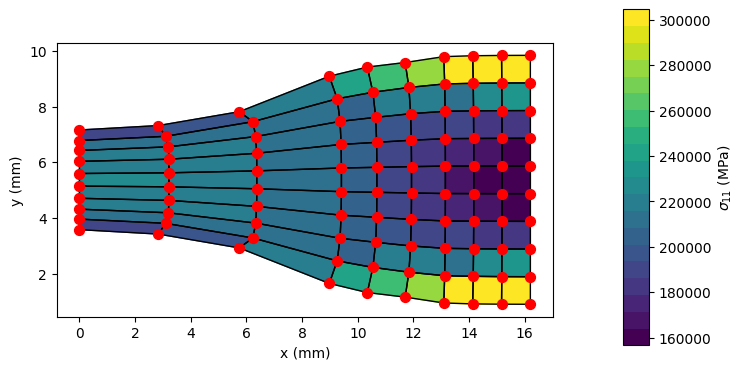

In [ ]:
# Define material parameters (Zirconium)

mu = 37.1e3 # Shear modulus
nu = 0.32 # Poisson's ratio
E = 2*mu*(1+nu) # Young's modulus

# Define domain and mesh parameters

LX = 9.
LY = 9.
mx = 9
my = 9
w = LX/mx
h = LY/my

# FEM construction

fec = fea.Model(dim=2,planestress=True)
fec.geom([3, 3, 3], LY=LY) # If sect is more than 3, define the length of each section

# Define each material composing the composite:
mat1 = fea.Material()
mat1.elasticity(E=E, nu=nu)
mat2 = fea.Material()
mat2.elasticity(E=E*8, nu=nu)
mat3 = fea.Material()
mat3.elasticity(E=E*100, nu=nu)
fec.assign([mat1,mat2,mat3])

# Define mesh:
fec.mesh(NX=mx,NY=my,SF=1)

# Boundary conditions

etot = 0.8*LX

fec.bcleft(0., 'disp','x')
fec.bcleft(0., 'force','y')
fec.bcright(etot, 'disp','x')
fec.bcright(0., 'force','y')
fec.bctop(0, 'force','x')
fec.bctop(0, 'force','y')
fec.bcbot(0., 'force','x')
fec.bcbot(0., 'force','y')

# Solve

fec.solve()

# Plot

fec.plot('stress1', mag=1)

# Challenges

## Challenge 1

Try changing the Poisson's ratio and find out what it does.

Hint (1): Try a tensile loading condition where the BCs are $u_x=0,f_y=0$ on the left side, $u_x=U,f_y=0$ on the right side, and $f_x=0,f_y=0$ on the top and bottom.

What happens when it is negative? (This is a property of so-called _auxetic_ materials)

## Challenge 2

Try changing the Young's modulus and find out what it does. What happens when it is negative?

Hint (1): try a tensile loading condition, and specifically try removing all strains that are not parallel to the x-axis.

## Challenge 3

Try changing the shear modulus and elucidate what it does. Try setting up a simulation where its function is clear. What happens when it is negative?